#**Spam Detector**
**Spam Detector** is an online Email/SMS Spam Classifier based binary classification model to detect whether a text message is spam or not (i.e Ham). 
 
Spam detection is one of the major applications of Machine Learning in the interwebs today. Pretty much all of the major email service providers have spam detection systems built in and automatically classify such mails as 'Junk Mail'.

Moreover In this project, we will be using many algorithms to create a model that can classify SMS messages as spam or not spam. Being able to identify spam messages is a binary classification problem as messages are classified as either 'Spam' or 'Not Spam'. Also, this is a **supervised learning problem**, as we will be feeding a labelled dataset into the model, that it can learn from, to make future predictions.


###**Overview :**  
####This project has been broken down in to the following steps:
#### 1. Data cleaning
#### 2. EDA ((Exploratory Data Analysis)
#### 3. Text Preprocessing
#### 4. Model building
#### 5. Evaluation
#### 6. Improvement

## Imports 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('/content/mail_data.csv')
# df = pd.read_csv('.csv')

In [ ]:
df.sample(5)

,Category,Message
2850,spam,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...
4635,ham,These won't do. Have to move on to morphine
112,ham,Going for dinner.msg you after.
5425,ham,Otherwise had part time job na-tuition..
3468,spam,URGENT! We are trying to contact U. Todays dra...


In [ ]:
df.shape

(5572, 2)

## 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.sample(5)

,Category,Message
810,ham,Ugh I don't wanna get out of bed. It's so warm.
360,ham,"Hello! Just got here, st andrews-boy its a lon..."
1603,ham,Ok pa. Nothing problem:-)
3827,ham,"Goodmorning,my grandfather expired..so am on l..."
1021,ham,Good afternoon on this glorious anniversary da...


In [ ]:
##Remaming the columns 
df.rename(columns={'Category':'Target','Message':'text'},inplace=True)
df.sample(5)

,Target,text
882,ham,"see, i knew giving you a break a few times wou..."
3640,ham,Wat's da model num of ur phone?
4351,ham,Yes. Rent is very expensive so its the way we ...
2678,ham,Where in abj are you serving. Are you staying ...
2679,ham,Was playng 9 doors game and gt racing on phone...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# converting the ham/spam value into 0's and 1's 
df['Target'] = encoder.fit_transform(df['Target'])

In [ ]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
## Check for Missing Values 
df.isnull().sum()

Target    0
text      0
dtype: int64

In [ ]:
## check for Duplicated Values
df.duplicated().sum()

415

In [ ]:
## removing duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5157, 2)

## 2. EDA (Exploratory Data Analysis)

In [ ]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Target'].value_counts()

0    4516
1     641
Name: Target, dtype: int64

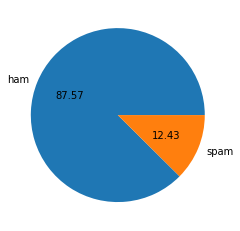

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
## Data is imbalanced


In [ ]:
!pip install nltk 

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)
df.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
## num of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.390537,1.965290
std,58.382922,13.307527,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
## Ham Messages
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.101417,1.822852
std,56.708301,13.488402,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
## Spam Messages
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.472699,2.968799
std,30.399707,6.988134,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,44.000000,9.000000


In [ ]:
import seaborn as sns

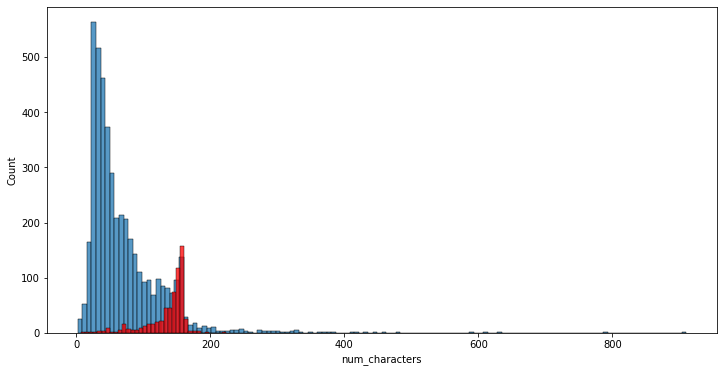

In [ ]:
# For number of characters comparision of spam and ham 
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

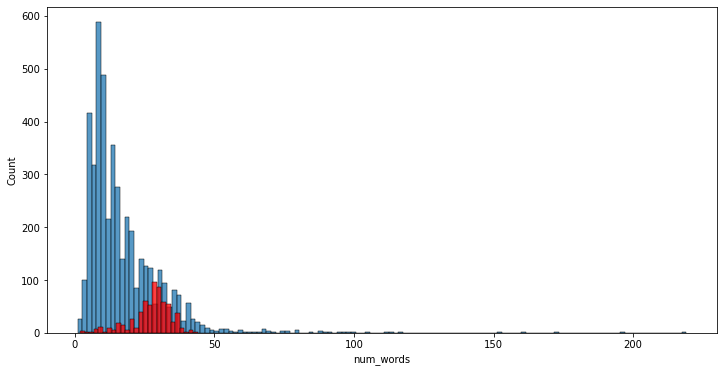

In [ ]:
# For number of Words comparision of spam and ham 
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

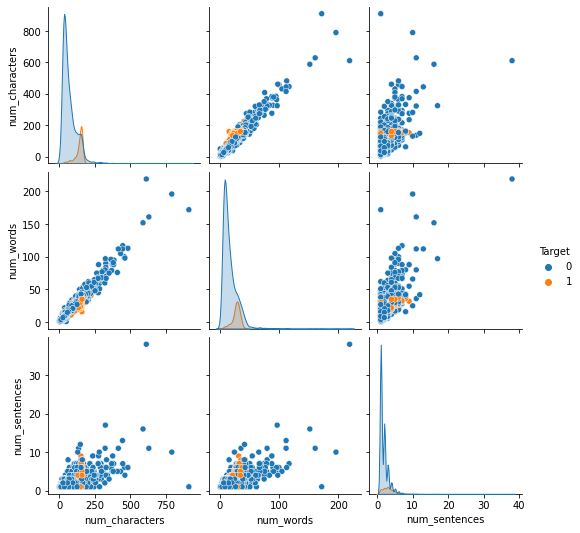

In [ ]:
sns.pairplot(df,hue='Target')

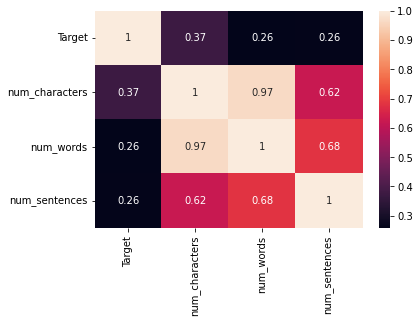

In [ ]:
# Correlation Coefficient 
# a number between +1 and −1 calculated so as to represent the linear interdependence of two variables or sets of data.
# The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables.
df.corr()
sns.heatmap(df.corr(),annot=True)

 ## 3. Data Preprocessing


In [ ]:
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation (is,am,ar...etc)
# Stemming

In [ ]:
 def transform_text(text):
        text=text.lower()
        text=nltk.word_tokenize(text)
        
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)
                
        text=y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
                
        text=y[:]
        y.clear()
        
        for i in text:
            y.append(ps.stem(i))
                
        return " ".join(y)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# transform_text('Hi How Are  Shogun You %% eg? I loved the you tube lectures on machine learning  how about you')
# transform_text('Hi How Are  Shogun You %% eg? I loved the you tube lectures on machine learning  how about you')
# transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [ ]:
# Tokenization  
# breaking in words 

In [ ]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

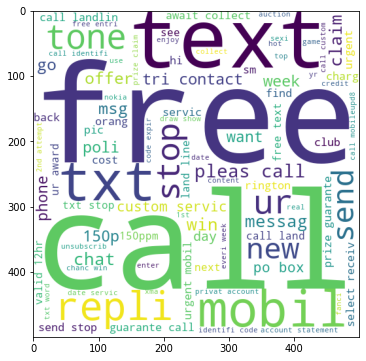

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

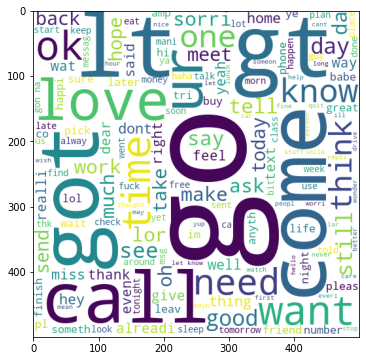

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# For Spam 
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9726

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


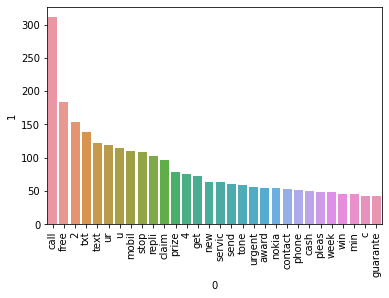

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# For ham 
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35290

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


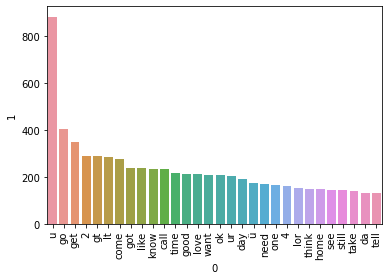

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

 **4. Model Building**

In [ ]:
# Naive Bayes 
# generally good for textual type datasets 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf =TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [ ]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)

In [ ]:
X.shape

(5157, 3000)

In [ ]:
y = df['Target'].values 
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb =BernoulliNB()

In [ ]:
## Gaussian Naive Bayes
gnb.fit(X_train, y_train)
y_pred1 =gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8624031007751938
[[779 126]
 [ 16 111]]
0.46835443037974683


In [ ]:
## Mulitnomial Naive Bayes
mnb.fit(X_train, y_train)
y_pred2 =mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9718992248062015
[[905   0]
 [ 29  98]]
1.0


In [ ]:
## Bernoullis Naive Bayes
bnb.fit(X_train, y_train)
y_pred3 =bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825581395348837
[[903   2]
 [ 16 111]]
0.9823008849557522


In [ ]:
## tfidf --> mnb

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9767441860465116, 0.9813084112149533)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9767441860465116
Precision -  0.9813084112149533
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9718992248062015
Precision -  1.0
For  DT
Accuracy -  0.937015503875969
Precision -  0.8297872340425532
For  LR
Accuracy -  0.9593023255813954
Precision -  0.9381443298969072
For  RF
Accuracy -  0.9718992248062015
Precision -  1.0
For  AdaBoost
Accuracy -  0.9680232558139535
Precision -  0.9607843137254902
For  BgC
Accuracy -  0.9631782945736435
Precision -  0.9009009009009009
For  ETC
Accuracy -  0.9757751937984496
Precision -  0.9903846153846154
For  GBDT
Accuracy -  0.9486434108527132
Precision -  0.9743589743589743
For  xgb
Accuracy -  0.9437984496124031
Precision -  0.96


**Comparsion on Basis of Accuracy**

In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False) 

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.976744,0.981308
8,ETC,0.975775,0.990385
2,NB,0.971899,1.000000
5,RF,0.971899,1.000000
6,AdaBoost,0.968023,0.960784
7,BgC,0.963178,0.900901
4,LR,0.959302,0.938144
9,GBDT,0.948643,0.974359
10,xgb,0.943798,0.960000
3,DT,0.937016,0.829787


**Comparsion on Basis of Precision**

In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False) 

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.971899,1.000000
5,RF,0.971899,1.000000
8,ETC,0.975775,0.990385
0,SVC,0.976744,0.981308
9,GBDT,0.948643,0.974359
6,AdaBoost,0.968023,0.960784
10,xgb,0.943798,0.960000
4,LR,0.959302,0.938144
7,BgC,0.963178,0.900901


**Comparison Graph of different Algorithms**

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.971899
2,RF,Accuracy,0.971899
3,ETC,Accuracy,0.975775
4,SVC,Accuracy,0.976744
5,GBDT,Accuracy,0.948643
6,AdaBoost,Accuracy,0.968023
7,xgb,Accuracy,0.943798
8,LR,Accuracy,0.959302
9,BgC,Accuracy,0.963178


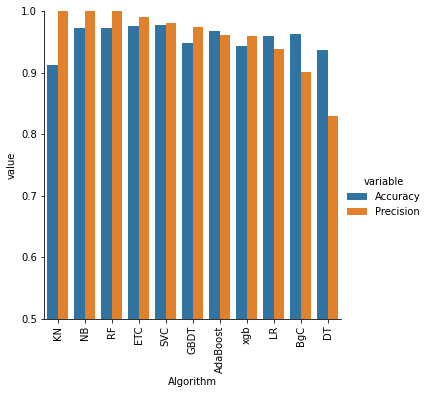

In [ ]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Accuracy_max_ft_3000',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000
2,RF,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000
3,ETC,0.975775,0.990385,0.975775,0.990385,0.975775,0.990385,0.975775,0.990385
4,SVC,0.976744,0.981308,0.976744,0.981308,0.976744,0.981308,0.976744,0.981308
5,GBDT,0.948643,0.974359,0.948643,0.974359,0.948643,0.974359,0.948643,0.974359
6,AdaBoost,0.968023,0.960784,0.968023,0.960784,0.968023,0.960784,0.968023,0.960784
7,xgb,0.943798,0.960000,0.943798,0.960000,0.943798,0.960000,0.943798,0.960000
8,LR,0.959302,0.938144,0.959302,0.938144,0.959302,0.938144,0.959302,0.938144
9,BgC,0.963178,0.900901,0.963178,0.900901,0.963178,0.900901,0.963178,0.900901


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825581395348837
Precision 1.0


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 0.9736842105263158


In [ ]:
# Pipeline
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))